In [241]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval
import datetime as dt
import seaborn as sns
%matplotlib inline

In [223]:
# Lendo a planilha
movie = pd.read_csv('movies_metadata.csv',sep=',',low_memory=False)

# Setando as configurações de visualização do dataset

In [224]:
pd.set_option('display.max_columns',None,'max_rows',None,'max_info_columns',100)
#movie.fillna('',inplace=True)
pd.options.display.float_format = '{:.2f}'.format

# Limpando os dados

In [225]:
movie.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.00,81.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.70,5415.00
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.00,104.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.90,2413.00
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.00,101.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.50,92.00
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.00,127.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.10,34.00
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.00,106.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.70,173.00


In [226]:
# Retirando os valores vazios
movie.dropna(subset=['vote_average','vote_count','release_date'],inplace=True)

In [227]:
# Retirando as colunas
movie.drop(columns=['imdb_id','video','poster_path','homepage','original_title'],inplace=True)

In [228]:
movie.isnull().sum()

adult                        0
belongs_to_collection    40888
budget                       0
genres                       0
id                           0
original_language           11
overview                   941
popularity                   0
production_companies         0
production_countries         0
release_date                 0
revenue                      0
runtime                    246
spoken_languages             0
status                      80
tagline                  24978
title                        0
vote_average                 0
vote_count                   0
dtype: int64

In [229]:
movie.duplicated(subset='title').sum()

3180

# Configurando os dados

In [230]:
# Extraindo a informação do gênero / produtora / país de produção / lingua falada e coleção de cada filme

# Returns the list top l elements or entire list; whichever is more.
def get_list(x, l=5):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than l elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > l:
            names = names[:l]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [ ]:
# Gênero
movie['genres'] = movie['genres'].apply(lambda x: literal_eval(str(x)))
movie['genres'] = movie['genres'].apply(lambda x: get_list(x))

In [ ]:
# Companhia
movie['production_companies'] = movie['production_companies'].apply(lambda x : literal_eval(x))
movie['production_companies'] = movie['production_companies'].apply(lambda x : get_list(x))

In [ ]:
# País
movie['production_countries'] = movie['production_countries'].apply(lambda x : literal_eval(x))
movie['production_countries'] = movie['production_countries'].apply(lambda x : get_list(x))

In [ ]:
# Língua
movie['spoken_languages'] = movie['spoken_languages'].apply(lambda x: literal_eval(x))
movie['spoken_languages'] = movie['spoken_languages'].apply(lambda x: get_list(x))

In [231]:
# Mudando os tipos de valores no dataset
movie['revenue'] = pd.to_numeric(movie['revenue'],errors='coerce')
movie['budget'] = pd.to_numeric(movie['budget'],errors='coerce')
movie['vote_count'] = pd.to_numeric(movie['vote_count'],errors='coerce')
movie['vote_average'] = pd.to_numeric(movie['vote_average'],errors='coerce')
movie['popularity'] = pd.to_numeric(movie['popularity'],errors='coerce')

In [232]:
# Acrescentando o indicador que diz a quantidade de generos por filme
def qtd_gen(x):
    return int(len(x))

movie['len_genres'] = movie['genres'].apply(lambda x: qtd_gen(x))

In [233]:
# Adicionando as colunas de ano e mês
def ano(x):
    return str(x).split('-')[0]

def mes(x):
    return str(x).split('-')[1]

# Aplicando as funções
movie['year'] = movie['release_date'].apply(lambda x : ano(x))
movie['month'] = movie['release_date'].apply(lambda x: mes(x))

In [234]:
# Extraindo os valores das colunas as quais transformei em listas
pro = movie.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
pro.name = 'countries'
comp = movie.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
comp.name = 'companies'
spl = movie.apply(lambda x: pd.Series(x['spoken_languages']),axis=1).stack().reset_index(level=1, drop=True)
spl.name = 'spoken_languages'

In [235]:
# Acrescentando as colunas novamente em um formato de str normal
movie = movie.drop('production_countries', axis=1).join(pro)
movie = movie.drop('production_companies', axis=1).join(comp)
movie = movie.drop('spoken_languages', axis=1).join(spl)

In [236]:
movie.head()

,adult,belongs_to_collection,budget,genres,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,len_genres,year,month,countries,companies,spoken_languages
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",862,en,"Led by Woody, Andy's toys live happily in his ...",21.95,1995-10-30,373554033.00,81.00,Released,NaN,Toy Story,7.70,5415.00,3,1995,10,United States of America,Pixar Animation Studios,English
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",8844,en,When siblings Judy and Peter discover an encha...,17.02,1995-12-15,262797249.00,104.00,Released,Roll the dice and unleash the excitement!,Jumanji,6.90,2413.00,3,1995,12,United States of America,TriStar Pictures,English
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",8844,en,When siblings Judy and Peter discover an encha...,17.02,1995-12-15,262797249.00,104.00,Released,Roll the dice and unleash the excitement!,Jumanji,6.90,2413.00,3,1995,12,United States of America,TriStar Pictures,Français
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",8844,en,When siblings Judy and Peter discover an encha...,17.02,1995-12-15,262797249.00,104.00,Released,Roll the dice and unleash the excitement!,Jumanji,6.90,2413.00,3,1995,12,United States of America,Teitler Film,English
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",8844,en,When siblings Judy and Peter discover an encha...,17.02,1995-12-15,262797249.00,104.00,Released,Roll the dice and unleash the excitement!,Jumanji,6.90,2413.00,3,1995,12,United States of America,Teitler Film,Français


# Task 1: Quais são o TOP 10 filmes que apresentam maiores popularidades?

In [84]:
# Extraindo o top 10 
top_10_popularidade = movie.groupby('title')['popularity'].sum().sort_values(ascending=False).head(10)
top_10_popularidade = top_10_popularidade.to_frame()
top_10_popularidade.reset_index(inplace=True)

In [90]:
# sorteando o dataframe para obter a visualização no gráfico
top_10_popularidade = top_10_popularidade.sort_values(by=['popularity'],ascending=True)

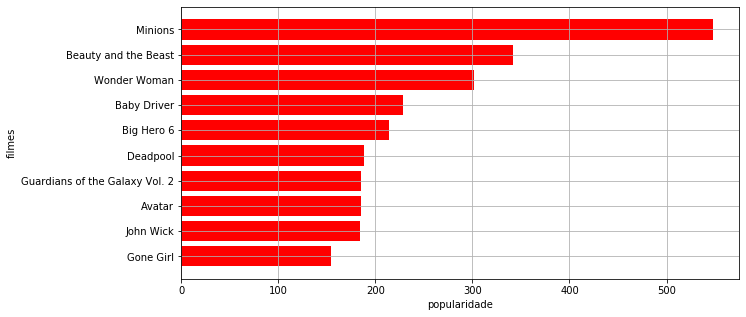

In [92]:
plt.figure(figsize=(10,5))
plt.barh(top_10_popularidade['title'],top_10_popularidade['popularity'],color='r')
plt.ylabel('filmes')
plt.xlabel('popularidade')
plt.grid(True)
plt.show()

# Task 2: Quais são os TOP 5 dos anos que obtiveram as maiores receitas ?

In [93]:
top5_receita = movie.groupby('year')['revenue'].sum().sort_values(ascending=False).head(5)
top5_receita = top5_receita.to_frame()
top5_receita.reset_index(inplace=True)

In [97]:
top5_receita = top5_receita.sort_values(by=['year'],ascending=True)

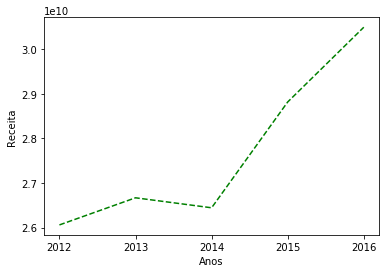

In [98]:
plt.plot(top5_receita['year'],top5_receita['revenue'],'g--')
plt.xlabel('Anos')
plt.ylabel('Receita')
plt.show()

# Task 3 : Qual a correlação da popularidade dos filmes de 2016 e suas receitas?

In [100]:
# Filtrando os filmes que foram feitos em 2016
movie_2016 = movie.loc[movie['year'] == '2016']

In [106]:
movie_2016.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,len_genres
count,1604.00,1604.00,1604.00,1595.00,1604.00,1604.00,1604.00
mean,6490771.27,4.15,19013638.72,93.67,5.82,192.60,1.85
std,24426168.57,8.27,94036510.24,34.43,1.99,704.91,0.99
min,0.00,0.03,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.57,0.00,85.00,5.20,4.00,1.00
50%,0.00,1.65,0.00,94.00,6.10,15.00,2.00
75%,0.00,5.23,0.00,107.00,7.00,59.00,3.00
max,250000000.00,187.86,1153304495.00,463.00,10.00,11444.00,5.00


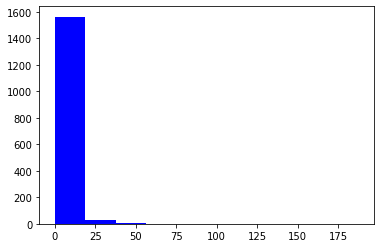

In [130]:
# visualização da frequencia em relação a popularidade
plt.hist(movie_2016['popularity'],color='b')
plt.show()

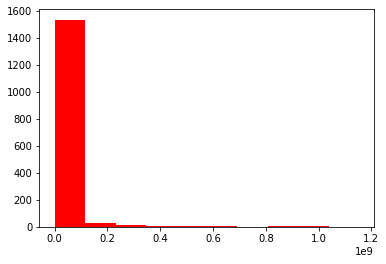

In [131]:
# visualização da frequencia em relação a receita
plt.hist(movie_2016['revenue'],color='r')
plt.show()

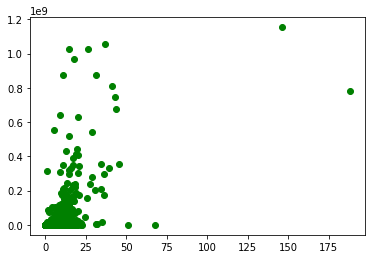

In [121]:
# Observando a correlação da popularidade com a receita 
plt.scatter(movie_2016['popularity'],movie_2016['revenue'],color='g')
plt.show()

In [125]:
movie_2016.loc[movie['popularity'] > 125]

,adult,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,len_genres,year,month
26564,False,"{'id': 448150, 'name': 'Deadpool Collection', ...",58000000,"[Action, Adventure, Comedy]",293660,en,Deadpool tells the origin story of former Spec...,187.86,"[Twentieth Century Fox Film Corporation, Marve...",[United States of America],2016-02-09,783112979.00,108.00,[English],Released,Witness the beginning of a happy ending,Deadpool,7.40,11444.00,3,2016,02
26567,False,"{'id': 131295, 'name': 'Captain America Collec...",250000000,"[Adventure, Action, Science Fiction]",271110,en,"Following the events of Age of Ultron, the col...",145.88,"[Studio Babelsberg, Marvel Studios, Walt Disne...",[United States of America],2016-04-27,1153304495.00,147.00,"[Română, English, Deutsch, Pусский]",Released,Divided We Fall,Captain America: Civil War,7.10,7462.00,3,2016,04


In [132]:
# Agrupando os dados dos filmes por receita e popularidade
top10_movies_2016 = movie_2016.groupby('title')['popularity','revenue'].sum().sort_values(by=['revenue'],ascending=False).head(10)
top10_movies_2016.reset_index(inplace=True)
top10_movies_2016

,title,popularity,revenue
0,Captain America: Civil War,145.88,1153304495.00
1,Rogue One: A Star Wars Story,36.57,1056057273.00
2,Finding Dory,14.48,1028570889.00
3,Zootopia,26.02,1023784195.00
4,The Jungle Book,17.43,966550600.00
5,The Secret Life of Pets,11.01,875457937.00
6,Batman v Superman: Dawn of Justice,31.44,873260194.00
7,Fantastic Beasts and Where to Find Them,41.05,809342332.00
8,Deadpool,187.86,783112979.00
9,Suicide Squad,42.97,745600054.00


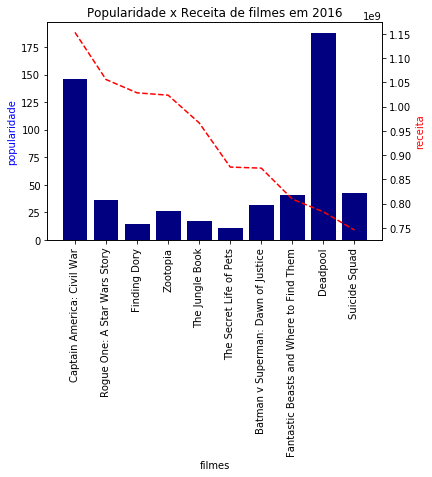

In [141]:
# Gráfico dos filmes 
fig, ax1 = plt.subplots(1,1)

filmes = [film for film in top10_movies_2016['title'].values]

ax2 = ax1.twinx()
ax1.bar(filmes,top10_movies_2016['popularity'],color='navy')
ax2.plot(filmes,top10_movies_2016['revenue'],'r--')
ax1.set_xticklabels(filmes,rotation='vertical',size=10)
plt.title('Popularidade x Receita de filmes em 2016')
ax1.set_xlabel('filmes')
ax1.set_ylabel('popularidade', color='blue')
ax2.set_ylabel('receita', color='red')

plt.show()

# Task 4: Quais são os TOP 10 filmes que obtiveram os maiores custos ? E, quais são suas relações de lucro ?

In [171]:
Top10_custos = movie.drop_duplicates(subset=['title'],keep="last")
Top10_custos = Top10_custos.groupby('title')['budget','revenue'].sum().sort_values(by=['budget'],ascending=False).head(10)
Top10_custos.reset_index(inplace=True)

In [172]:
Top10_custos['Lucro'] = Top10_custos['revenue'] - Top10_custos['budget']

In [173]:
Top10_custos

,title,budget,revenue,Lucro
0,Pirates of the Caribbean: On Stranger Tides,380000000,1045713802.00,665713802.00
1,Pirates of the Caribbean: At World's End,300000000,961000000.00,661000000.00
2,Avengers: Age of Ultron,280000000,1405403694.00,1125403694.00
3,Superman Returns,270000000,391081192.00,121081192.00
4,John Carter,260000000,284139100.00,24139100.00
5,Transformers: The Last Knight,260000000,604942143.00,344942143.00
6,Spider-Man 3,258000000,890871626.00,632871626.00
7,Harry Potter and the Deathly Hallows: Part 1,250000000,954305868.00,704305868.00
8,The Hobbit: An Unexpected Journey,250000000,1021103568.00,771103568.00
9,The Hobbit: The Battle of the Five Armies,250000000,956019788.00,706019788.00


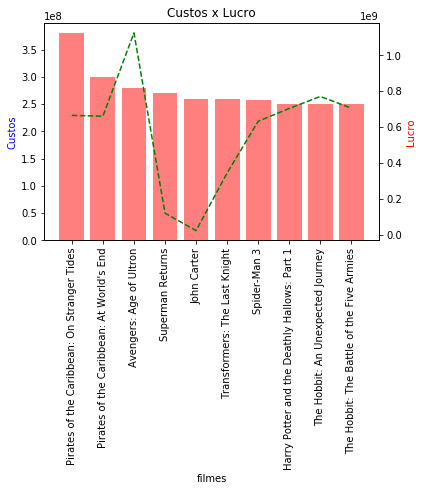

In [249]:
# Gráfico dos filmes com maiores notas com suas respectivas médias de popularidade
fig, ax1 = plt.subplots()

filmes = [film for film in Top10_custos['title'].values]

ax2 = ax1.twinx()
ax1.bar(filmes,Top10_custos['budget'],color='r',alpha=0.5)
ax2.plot(filmes,Top10_custos['Lucro'],'g--')
ax1.set_xticklabels(filmes,rotation='vertical',size=10)
plt.title('Custos x Lucro')
ax1.set_xlabel('filmes')
ax1.set_ylabel('Custos', color='blue')
ax2.set_ylabel('Lucro', color='red')

plt.show()

# Task 5: Top 10 das produtoras com os maiores valores de receita

In [239]:
Top10_prod = pd.DataFrame(movie.groupby('companies')['revenue'].sum().sort_values(ascending=False).head(10)).reset_index()

In [240]:
Top10_prod

,companies,revenue
0,Warner Bros.,143297304921.00
1,Universal Pictures,128229453992.00
2,Twentieth Century Fox Film Corporation,119602462006.00
3,Paramount Pictures,113032767742.00
4,Columbia Pictures,93057839818.00
5,Walt Disney Pictures,59320651434.00
6,Dune Entertainment,49830324144.00
7,New Line Cinema,43721955030.00
8,Ingenious Film Partners,41456455837.00
9,Village Roadshow Pictures,35721125267.00


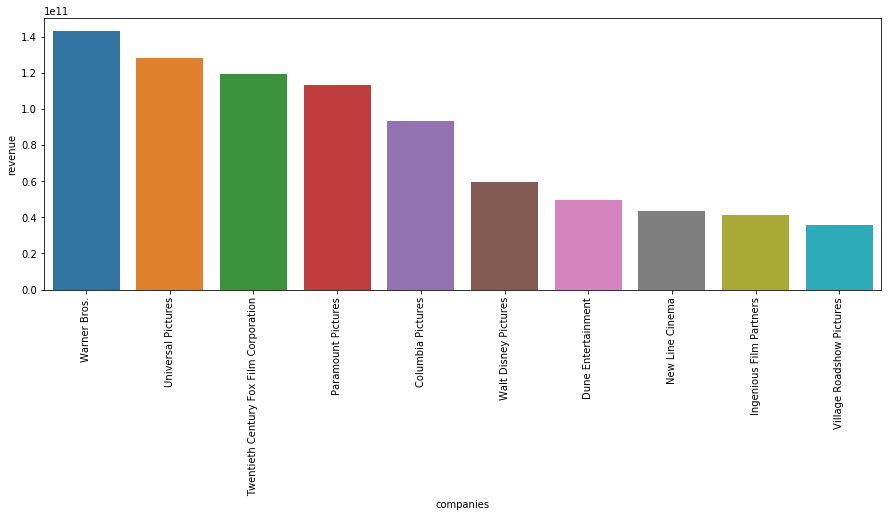

In [248]:
plt.figure(figsize=(15,5))
sns.barplot(x=Top10_prod['companies'], y=Top10_prod['revenue'])
plt.xticks(rotation='vertical')
plt.show()

# Task 2 : Qual filme apresenta a maior soma da média de votos ? 